In [8]:
using PyCall
using LinearAlgebra

using DrWatson
quickactivate(@__DIR__)

using NetHeider

py"""
import pickle
 
def load_pickle(fpath):
    with open(fpath, "rb") as f:
        data = pickle.load(f)
    return data
"""

load_pickle = py"load_pickle"

PyObject <function load_pickle at 0x7f3fce7bf310>

In [2]:
fname = datadir("exp_pro", "NetSense_network.pkl")
file = load_pickle(fname)

Dict{Any, Any} with 6 entries:
  5 => PyObject <networkx.classes.graph.Graph object at 0x7f3fce6c8a00>
  4 => PyObject <networkx.classes.graph.Graph object at 0x7f3fce70edc0>
  6 => PyObject <networkx.classes.graph.Graph object at 0x7f3fce68bd00>
  2 => PyObject <networkx.classes.graph.Graph object at 0x7f3fce78b520>
  3 => PyObject <networkx.classes.graph.Graph object at 0x7f3fce6d3160>
  1 => PyObject <networkx.classes.graph.Graph object at 0x7f3fdcddc970>

In [3]:
py"""
import networkx as nx
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_adjacency_matrix(net, ordering = None):
    return nx.adjacency_matrix(net, ordering).todense() 
"""

function get_triads2(A)
    

    N = size(A)[1]

    triads = []

    for i in 1:N
        for j in (i+1):N
            if A[i,j] > 0
                for k in (j+1):N
                    if A[i,k] > 0 && A[j,k] > 0
                        push!(triads, (i,j,k))
                    end
                end
            end
        end
    end
    
    return triads
end

get_triads = py"get_triads"
get_adjacency_matrix = py"get_adjacency_matrix"

PyObject <function get_adjacency_matrix at 0x7f3fce760b80>

In [4]:
function get_all_nodes(file)
    nodes = [n for n in file[1].nodes]
    for i in 2:6
        nodes = [nodes..., [n for n in file[i].nodes()]...]
    end
    return unique(nodes)
end

function create_series_adj_mat(file, nodes = get_all_nodes(file))
    As = [get_adjacency_matrix(file[i], nodes) for i in 1:6]
    return As
end

create_series_adj_mat (generic function with 2 methods)

In [5]:
nodes = get_all_nodes(file)
Ws = create_series_adj_mat(file, nodes)
As = [sign.(W) for W in Ws]

i=1; inc = 1;
display((sum(abs.(As[i + inc] .- As[i]))/2, sum(As[i])/2, sum(As[i+inc])/2))

overlap = zeros(6,6)
for i in 1:6, j in 1:6
    overlap[i,j] = sum(As[i].*As[j]) / sum(sign.(As[i] .+ As[j]))
end
display(overlap)

#how many links vanish?
not_vanish = zeros(6,6)
vanish_abs = zeros(6,6)
for i in 1:6
    for j in i:6
        not_vanish[i,j] = sum(As[i].*As[j]) / sum(As[i])
        vanish_abs[i,j] = (sum(As[i]) - sum(As[i].*As[j]))/2
    end
end
display(not_vanish)
display(vanish_abs)


(108.0, 152.0, 116.0)

6×6 Matrix{Float64}:
 1.0       0.425532  0.260355  0.318182  0.258706  0.255682
 0.425532  1.0       0.427419  0.530612  0.466216  0.350365
 0.260355  0.427419  1.0       0.478261  0.421053  0.397849
 0.318182  0.530612  0.478261  1.0       0.578947  0.401575
 0.258706  0.466216  0.421053  0.578947  1.0       0.491228
 0.255682  0.350365  0.397849  0.401575  0.491228  1.0

6×6 Matrix{Float64}:
 1.0  0.526316  0.289474  0.414474  0.342105  0.296053
 0.0  1.0       0.456897  0.672414  0.594828  0.413793
 0.0  0.0       1.0       0.901639  0.786885  0.606557
 0.0  0.0       0.0       1.0       0.706422  0.46789
 0.0  0.0       0.0       0.0       1.0       0.554455
 0.0  0.0       0.0       0.0       0.0       1.0

6×6 Matrix{Float64}:
 0.0  72.0  108.0  89.0  100.0  107.0
 0.0   0.0   63.0  38.0   47.0   68.0
 0.0   0.0    0.0   6.0   13.0   24.0
 0.0   0.0    0.0   0.0   32.0   58.0
 0.0   0.0    0.0   0.0    0.0   45.0
 0.0   0.0    0.0   0.0    0.0    0.0

In [6]:
#how many links appear?
appear = zeros(6,6)
appear_abs = zeros(6,6)
for i in 1:6
    for j in i:6
        appear[i,j] = sum(As[i].*As[j]) / sum(As[j])
        appear_abs[i,j] = (sum(As[j]) - sum(As[i].*As[j])) / 2
    end
end
display(appear)
display(appear_abs)

6×6 Matrix{Float64}:
 1.0  0.689655  0.721311  0.577982  0.514851  0.652174
 0.0  1.0       0.868852  0.715596  0.683168  0.695652
 0.0  0.0       1.0       0.504587  0.475248  0.536232
 0.0  0.0       0.0       1.0       0.762376  0.73913
 0.0  0.0       0.0       0.0       1.0       0.811594
 0.0  0.0       0.0       0.0       0.0       1.0

6×6 Matrix{Float64}:
 0.0  36.0  17.0  46.0  49.0  24.0
 0.0   0.0   8.0  31.0  32.0  21.0
 0.0   0.0   0.0  54.0  53.0  32.0
 0.0   0.0   0.0   0.0  24.0  18.0
 0.0   0.0   0.0   0.0   0.0  13.0
 0.0   0.0   0.0   0.0   0.0   0.0

In [7]:
#find prob of triad vanishing
all_triads = [get_triads2(As[i]) for i in 1:6]

# intersect(all_triads[1], all_triads[2])

#how many triads vanish?
triad_not_vanish = zeros(6,6)
triad_vanish_abs = zeros(6,6)
for i in 1:6
    for j in i:6
        triad_not_vanish[i,j] = length(intersect(all_triads[i], all_triads[j])) / length(all_triads[i])
        triad_vanish_abs[i,j] = length(all_triads[i]) - length(intersect(all_triads[i], all_triads[j]))
    end
end
display(triad_not_vanish)
display(triad_vanish_abs)

6×6 Matrix{Float64}:
 1.0  0.377778  0.111111  0.222222  0.222222  0.111111
 0.0  1.0       0.307692  0.538462  0.461538  0.230769
 0.0  0.0       1.0       1.0       0.888889  0.777778
 0.0  0.0       0.0       1.0       0.692308  0.346154
 0.0  0.0       0.0       0.0       1.0       0.5
 0.0  0.0       0.0       0.0       0.0       1.0

6×6 Matrix{Float64}:
 0.0  28.0  40.0  35.0  35.0  40.0
 0.0   0.0  18.0  12.0  14.0  20.0
 0.0   0.0   0.0   0.0   1.0   2.0
 0.0   0.0   0.0   0.0   8.0  17.0
 0.0   0.0   0.0   0.0   0.0  10.0
 0.0   0.0   0.0   0.0   0.0   0.0

In [13]:
map(length, all_triads)'

1×6 adjoint(::Vector{Int64}) with eltype Int64:
 45  26  9  26  20  12

In [9]:
function get_wedges_single_edges(A)
    N = size(A)[1]

    wedges = []
    single_edges = []

    for i in 1:N
        for j in (i+1):N
            for k in (j+1):N
                if A[i,k] + A[j,k] + A[i,j] == 2
                    push!(wedges, (i,j,k))
                elseif A[i,k] + A[j,k] + A[i,j] == 1
                    push!(single_edges, (i,j,k))
                end
            end
        end
    end
    
    return wedges, single_edges
end

get_wedges_single_edges (generic function with 1 method)

In [10]:
all_wedges = []
all_singles = []
for i in 1:6
    wedges, single_edges = get_wedges_single_edges(As[i])
    push!(all_wedges, wedges)
    push!(all_singles, single_edges)
end

In [11]:
function understand_triad_apperance(As)
    num_mats = length(As)

    all_triads = [get_triads2(As[i]) for i in 1:num_mats]
    all_wedges = []
    all_singles = []
    for i in 1:num_mats
        wedges, single_edges = get_wedges_single_edges(As[i])
        push!(all_wedges, wedges)
        push!(all_singles, single_edges)
    end

    

    triad_appear = zeros(num_mats,num_mats)
    triad_appear_wedges = zeros(num_mats,num_mats)
    triad_appear_single = zeros(num_mats,num_mats)
    triad_appear_nowhere = zeros(num_mats,num_mats)

    for i in 1:num_mats
        for j in i:num_mats
            triad_appear[i,j] = length(all_triads[j]) - length(intersect(all_triads[i], all_triads[j]))
            new_triads = setdiff(all_triads[j], all_triads[i])
            @assert length(new_triads) == triad_appear[i,j]
            triad_appear_wedges[i,j] = length(intersect(new_triads, all_wedges[i]))

            triad_appear_single[i,j] = length(intersect(new_triads, all_singles[i]))
            # triad_vanish_abs[i,j] = length(all_triads[i]) - length(intersect(all_triads[i], all_triads[j]))
            triad_appear_nowhere[i,j] = triad_appear[i,j] - triad_appear_wedges[i, j] - triad_appear_single[i, j]
        end
    end
    return triad_appear, triad_appear_wedges, triad_appear_single, triad_appear_nowhere
end

understand_triad_apperance (generic function with 1 method)

In [12]:
# find prob of tried appearing (from wedges, from single link, from nowhere)

triad_appear = zeros(6,6)
triad_appear_wedges = zeros(6,6)
triad_appear_single = zeros(6,6)
triad_appear_nowhere = zeros(6,6)
for i in 1:6
    for j in i:6
        triad_appear[i,j] = length(all_triads[j]) - length(intersect(all_triads[i], all_triads[j]))
        new_triads = setdiff(all_triads[j], all_triads[i])
        @assert length(new_triads) == triad_appear[i,j]
        triad_appear_wedges[i,j] = length(intersect(new_triads, all_wedges[i]))

        triad_appear_single[i,j] = length(intersect(new_triads, all_singles[i]))
        # triad_vanish_abs[i,j] = length(all_triads[i]) - length(intersect(all_triads[i], all_triads[j]))
        triad_appear_nowhere[i,j] = triad_appear[i,j] - triad_appear_wedges[i, j] - triad_appear_single[i, j]
    end
end
display(triad_appear)
display(triad_appear_wedges)
display(triad_appear_single)
display(triad_appear_nowhere)

6×6 Matrix{Float64}:
 0.0  9.0  4.0  16.0  10.0  7.0
 0.0  0.0  1.0  12.0   8.0  6.0
 0.0  0.0  0.0  17.0  12.0  5.0
 0.0  0.0  0.0   0.0   2.0  3.0
 0.0  0.0  0.0   0.0   0.0  2.0
 0.0  0.0  0.0   0.0   0.0  0.0

6×6 Matrix{Float64}:
 0.0  8.0  4.0   9.0  5.0  4.0
 0.0  0.0  1.0   9.0  5.0  3.0
 0.0  0.0  0.0  12.0  9.0  2.0
 0.0  0.0  0.0   0.0  2.0  2.0
 0.0  0.0  0.0   0.0  0.0  2.0
 0.0  0.0  0.0   0.0  0.0  0.0

6×6 Matrix{Float64}:
 0.0  1.0  0.0  7.0  4.0  2.0
 0.0  0.0  0.0  3.0  3.0  2.0
 0.0  0.0  0.0  4.0  3.0  3.0
 0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

6×6 Matrix{Float64}:
 0.0  0.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [13]:
# test
triad_appear2, triad_appear_wedges2, triad_appear_single2, triad_appear_nowhere2 = understand_triad_apperance(As)

@assert triad_appear_wedges2 == triad_appear_wedges
@assert triad_appear_single2 == triad_appear_single
@assert triad_appear_nowhere2 == triad_appear_nowhere
@assert triad_appear == triad_appear2

In [14]:
# Let's make an expetiment. 
# Lets remove connections that vanish from term I and 
# randomly new connections and 
# see how many new triads were formed, and from which structures. 

#removing edges from A1
start_term = 1
inc = 1
A1r = As[start_term] .* As[start_term + inc] 

# We need to add this amount of new links:
display(appear_abs[start_term, start_term + inc])
N = length(nodes)

added = 0
while added < appear_abs[start_term, start_term + inc]
    i, j = rand(1:N, 2)
    if i==j continue
    elseif A1r[i,j] > 0
        continue
    else
        A1r[i,j] = A1r[j,i] = 1
        added += 1
    end
end
# display("finishes")

triad_appear2, triad_appear_wedges2, triad_appear_single2, triad_appear_nowhere2 = understand_triad_apperance([As[start_term], A1r])
display(triad_appear2)
display(triad_appear_wedges2)
display(triad_appear_single2)
display(triad_appear_nowhere2)

# Conclusion:
# As expected, more triads are created than random would expect

36.0

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [15]:
# Let's check how many people are in triads

triad_nodes = sort(unique([node for triads in all_triads for triad in triads for node in triad]))
display(length(triad_nodes))

# There are only 60 nodes, so lets repeat above experiment with generating links only among these agents. 
# But first I need to count how many edges were added among those agents

As2 = [As[i][triad_nodes, triad_nodes] for i in 1:6]

60

6-element Vector{Matrix{Int64}}:
 [0 1 … 0 0; 1 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 1; … ; 0 0 … 0 0; 0 1 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]

In [16]:
#how many links appear?
appear_triads = zeros(6,6)
appear_abs_triads = zeros(6,6)
for i in 1:6
    for j in i:6
        appear_triads[i,j] = sum(As2[i].*As2[j]) / sum(As2[j])
        appear_abs_triads[i,j] = (sum(As2[j]) - sum(As2[i].*As2[j])) / 2
    end
end
display(appear_triads)
display(appear_abs_triads)

6×6 Matrix{Float64}:
 1.0  0.763158  0.770833  0.626667  0.602941  0.705882
 0.0  1.0       0.875     0.733333  0.705882  0.705882
 0.0  0.0       1.0       0.586667  0.573529  0.627451
 0.0  0.0       0.0       1.0       0.823529  0.764706
 0.0  0.0       0.0       0.0       1.0       0.843137
 0.0  0.0       0.0       0.0       0.0       1.0

6×6 Matrix{Float64}:
 0.0  18.0  11.0  28.0  27.0  15.0
 0.0   0.0   6.0  20.0  20.0  15.0
 0.0   0.0   0.0  31.0  29.0  19.0
 0.0   0.0   0.0   0.0  12.0  12.0
 0.0   0.0   0.0   0.0   0.0   8.0
 0.0   0.0   0.0   0.0   0.0   0.0

In [17]:
# Experiment 2. 

#removing edges from A1
start_term = 1
inc = 1
A1r = As2[start_term] .* As2[start_term + inc] 

# We need to add this amount of new links:
display(appear_abs_triads[start_term, start_term + inc])
N = length(triad_nodes)

added = 0
while added < appear_abs_triads[start_term, start_term + inc]
    i, j = rand(1:N, 2)
    if i==j continue
    elseif A1r[i,j] > 0
        continue
    else
        A1r[i,j] = A1r[j,i] = 1
        added += 1
    end
end
# display("finishes")

triad_appear3, triad_appear_wedges3, triad_appear_single3, triad_appear_nowhere3 = understand_triad_apperance([As2[start_term], A1r])
display(triad_appear3)
display(triad_appear_wedges3)
display(triad_appear_single3)
display(triad_appear_nowhere3)

# Conclusion:
# As expected, more triads are created than random would expect

18.0

2×2 Matrix{Float64}:
 0.0  1.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  1.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [18]:
# OK, lets try to generate triads more frequently. 
# There will be a new parameter for closing triads.

close_triad = 0.7

# function get_nodes_in_triads(A)
#     triads = get_triads2(A)

#     return sort(unique([node for triad in triads for node in triad.nodes]))
# end

# Experiment 3. 

#removing edges from A1
start_term = 2
inc = 1
A1r = As2[start_term] .* As2[start_term + inc] 

# We need to add this amount of new links:
display(appear_abs_triads[start_term, start_term + inc])
N = length(triad_nodes)

added = 0
while added < appear_abs_triads[start_term, start_term + inc]
    wedges_t, single_t = get_wedges_single_edges(A1r)
    if rand() < close_triad
        wedge = rand(wedges_t)
        if A1r[wedge[1], wedge[2]] == 0
            i, j = wedge[1], wedge[2]
        elseif A1r[wedge[1], wedge[3]] == 0
            i, j = wedge[1], wedge[3]
        else i, j = wedge[2], wedge[3]
        end
    else
        i, j = rand(1:N, 2)
        if i==j continue
        elseif A1r[i,j] > 0
            continue
        end
    end
    A1r[i,j] = A1r[j,i] = 1
    added += 1
end
# display("finishes")

triad_appear3, triad_appear_wedges3, triad_appear_single3, triad_appear_nowhere3 = understand_triad_apperance([As2[start_term], A1r])
display(triad_appear3)
display(triad_appear_wedges3)
display(triad_appear_single3)
display(triad_appear_nowhere3)

# Conclusion:
# As expected, more triads are created than random would expect

6.0

2×2 Matrix{Float64}:
 0.0  4.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  3.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  1.0
 0.0  0.0

2×2 Matrix{Float64}:
 0.0  0.0
 0.0  0.0

In [19]:
# defining functions to calibrate this probability
function add_edges!(A1r, edges_to_add, close_triad)
    N = size(A1r)[1]

    added = 0
    while added < edges_to_add
        wedges_t, single_t = get_wedges_single_edges(A1r)
        if rand() < close_triad
            wedge = rand(wedges_t)
            if A1r[wedge[1], wedge[2]] == 0
                i, j = wedge[1], wedge[2]
            elseif A1r[wedge[1], wedge[3]] == 0
                i, j = wedge[1], wedge[3]
            else i, j = wedge[2], wedge[3]
            end
        else
            i, j = rand(1:N, 2)
            if i==j continue
            elseif A1r[i,j] > 0
                continue
            end
        end
        A1r[i,j] = A1r[j,i] = 1
        added += 1
    end
end

function calc_difs(close_triad_prob; term_pairs = [(1, 2), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6)], repetitions = 10)
    dif = 0

    for _ in 1:repetitions
        for term_pair in term_pairs
            start_term = term_pair[1]
            inc = term_pair[2] - start_term

            A1r = As2[start_term] .* As2[start_term + inc] 
            add_edges!(A1r, appear_abs_triads[start_term, start_term + inc], close_triad_prob)
            triad_appear3, triad_appear_wedges3, triad_appear_single3, triad_appear_nowhere3 = understand_triad_apperance([As2[start_term], A1r])

            dif += abs(triad_appear[term_pair...] - triad_appear3[1,2])
            dif += abs(triad_appear_wedges[term_pair...] - triad_appear_wedges3[1,2])
            dif += abs(triad_appear_single[term_pair...] - triad_appear_single3[1,2])
            dif += abs(triad_appear_nowhere[term_pair...] - triad_appear_nowhere3[1,2])
        end
    end
    return dif
end

function calc_difs_only_numT(close_triad_prob; term_pairs = [(1, 2), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6)], repetitions = 10)
    dif = 0

    for _ in 1:repetitions
        for term_pair in term_pairs
            start_term = term_pair[1]
            inc = term_pair[2] - start_term

            A1r = As2[start_term] .* As2[start_term + inc] 
            add_edges!(A1r, appear_abs_triads[start_term, start_term + inc], close_triad_prob)
            triad_appear3, triad_appear_wedges3, triad_appear_single3, triad_appear_nowhere3 = understand_triad_apperance([As2[start_term], A1r])

            dif += abs(triad_appear[term_pair...] - triad_appear3[1,2])
        end
    end
    return dif
end

calc_difs_only_numT (generic function with 1 method)

In [20]:
# calibration!
# We choose pairs of terms that will be compared. 
term_pairs = [(1, 2), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6)]
repetitions = 100

close_triad_prob = 0.3

dif = 0

for _ in 1:repetitions
    for term_pair in term_pairs
        start_term = term_pair[1]
        inc = term_pair[2] - start_term

        A1r = As2[start_term] .* As2[start_term + inc] 
        add_edges!(A1r, appear_abs_triads[start_term, start_term + inc], close_triad_prob)
        triad_appear3, triad_appear_wedges3, triad_appear_single3, triad_appear_nowhere3 = understand_triad_apperance([As2[start_term], A1r])

        dif += abs(triad_appear[term_pair...] - triad_appear3[1,2])
        dif += abs(triad_appear_wedges[term_pair...] - triad_appear_wedges3[1,2])
        dif += abs(triad_appear_single[term_pair...] - triad_appear_single3[1,2])
        dif += abs(triad_appear_nowhere[term_pair...] - triad_appear_nowhere3[1,2])
    end
end

dif

4208.0

## Let's count attribute changes now

In [21]:
#creating list of attributes
list_of_attributes = Set([k for n in file[1].nodes for k in keys(file[1].nodes[n+1])])

# creating possible attribute values
attribute_values = Dict((attribute, Set() ) for attribute in list_of_attributes)

for sem in 1:6
    for node in file[sem].nodes()
        for attribute in list_of_attributes
            push!(attribute_values[attribute], convert(Int, file[sem].nodes[node + 1][attribute]))
        end
    end
end

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

Dict{String, Set{Any}} with 12 entries:
  "premaritalsex_" => Set([2, 3, 1])
  "ethnicity_1"    => Set([4, 2, 3, 1])
  "hometown_1"     => Set([2, 3, 1])
  "political_"     => Set([2, 3, 1])
  "abortion_"      => Set([2, 3, 1])
  "homosexual_"    => Set([2, 3, 1])
  "marijuana_"     => Set([2, 3, 1])
  "gender_1"       => Set([2, 1])
  "gaymarriage_"   => Set([2, 3, 1])
  "deathpen_"      => Set([2, 3, 1])
  "euthanasia_"    => Set([2, 3, 1])
  "age_1"          => Set([2, 1])

In [22]:
#creating table of attribute values
attributes = Dict((i, zeros(length(nodes), length(list_of_attributes))) for i in 1:6)
# for i in 1:6
#     attributes[i] = zeros(length(file[i].nodes), length(list_of_attributes))
# end

for sem in 1:6
    for (i, node) in enumerate(nodes)
        for (j, attribute) in enumerate(list_of_attributes)
            if node in file[sem].nodes()
                attributes[sem][i,j] = file[sem].nodes[node + 1][attribute]
            else
                attributes[sem][i,j] = NaN
            end
        end
    end
end
attributes

Dict{Int64, Matrix{Float64}} with 6 entries:
  5 => [3.0 3.0 … 2.0 1.0; 3.0 3.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; 1.0 3.0 … …
  4 => [3.0 3.0 … 2.0 1.0; 3.0 3.0 … 2.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 3.0 … …
  6 => [NaN NaN … NaN NaN; 3.0 3.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  2 => [NaN NaN … NaN NaN; 3.0 3.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  3 => [3.0 3.0 … 2.0 1.0; 3.0 1.0 … 2.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  1 => [3.0 3.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0; … ; NaN NaN … NaN NaN; NaN NaN … …

In [23]:

ord_list_of_attributes = setdiff(list_of_attributes, ["ethnicity_1", "gender_1", "hometown_1", "age_1"])
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = Dict((i, zeros(length(nodes), length(ord_list_of_attributes))) for i in 1:6)

for sem in 1:6
    for (i, node) in enumerate(nodes)
        for (j, attribute) in enumerate(ord_list_of_attributes)
            if node in file[sem].nodes()
                ord_attributes[sem][i,j] = file[sem].nodes[node + 1][attribute]
            else
                ord_attributes[sem][i,j] = NaN
            end
        end
    end
end
# for sem in range(1,7):
#     for i, node in enumerate(data[sem].nodes()):
#         for j, attribute in enumerate(ord_list_of_attributes):
#             ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
ord_attributes

Set(["abortion_", "premaritalsex_", "homosexual_", "marijuana_", "euthanasia_", "gaymarriage_", "deathpen_", "political_"])

Dict{Int64, Matrix{Float64}} with 6 entries:
  5 => [3.0 3.0 … 3.0 1.0; 3.0 3.0 … 3.0 2.0; … ; NaN NaN … NaN NaN; 1.0 3.0 … …
  4 => [3.0 3.0 … 3.0 1.0; 3.0 3.0 … 1.0 1.0; … ; 1.0 1.0 … 3.0 1.0; 1.0 3.0 … …
  6 => [NaN NaN … NaN NaN; 3.0 3.0 … 3.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  2 => [NaN NaN … NaN NaN; 3.0 3.0 … 1.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  3 => [3.0 3.0 … 3.0 1.0; 3.0 1.0 … 1.0 2.0; … ; NaN NaN … NaN NaN; NaN NaN … …
  1 => [3.0 3.0 … 3.0 1.0; 2.0 2.0 … 2.0 1.0; … ; NaN NaN … NaN NaN; NaN NaN … …

In [24]:
# a change is a change of attribute from 1 to 2. a change from 1 to 3 are two changes. 
function count_attr_changes(ord_attributes)
    sems = length(ord_attributes)
    N = size(ord_attributes[1])[1]

    changes = zeros(sems, sems)
    max_change = zeros(sems, sems)

    # for sem1 in 1:sems, sem2 in 1:sems
    for i in 1:sems
        for j in i:sems
            attr_change = abs.(ord_attributes[i] .- ord_attributes[j])

            changes[i,j] = sum(filter(!isnan, attr_change))
            max_change[i,j] = length(filter(!isnan, attr_change))*2
        end
    end
    return changes, max_change
end

# a change is a change of attribute from 1 to 2. a change from 1 to 3 are two changes. 
function count_attr_stays(ord_attributes)
    sems = length(ord_attributes)
    N = size(ord_attributes[1])[1]

    stays = zeros(sems, sems)
    max_stays = zeros(sems, sems)

    # for sem1 in 1:sems, sem2 in 1:sems
    for i in 1:sems
        for j in i:sems
            attr_stay = sum(ord_attributes[i] .== ord_attributes[j])

            stays[i,j] = attr_stay
            max_stays[i,j] = length(filter(!isnan, ord_attributes[i] .+ ord_attributes[j]))
        end
    end
    return stays, max_stays
end

count_attr_stays (generic function with 1 method)

In [25]:
changes, max_change = count_attr_changes(ord_attributes)

display(changes)
display(max_change)

6×6 Matrix{Float64}:
 0.0  210.0  192.0  248.0  238.0  193.0
 0.0    0.0  126.0  153.0  175.0  143.0
 0.0    0.0    0.0  119.0  125.0  124.0
 0.0    0.0    0.0    0.0  148.0  129.0
 0.0    0.0    0.0    0.0    0.0  103.0
 0.0    0.0    0.0    0.0    0.0    0.0

6×6 Matrix{Float64}:
 1568.0  1376.0  1072.0  1360.0  1296.0  1008.0
    0.0  1424.0  1040.0  1312.0  1248.0   960.0
    0.0     0.0  1088.0  1072.0  1008.0   848.0
    0.0     0.0     0.0  1424.0  1280.0   960.0
    0.0     0.0     0.0     0.0  1360.0   992.0
    0.0     0.0     0.0     0.0     0.0  1008.0

In [26]:
changes ./ max_change

6×6 Matrix{Float64}:
   0.0    0.152616    0.179104    0.182353    0.183642  0.191468
 NaN      0.0         0.121154    0.116616    0.140224  0.148958
 NaN    NaN           0.0         0.111007    0.124008  0.146226
 NaN    NaN         NaN           0.0         0.115625  0.134375
 NaN    NaN         NaN         NaN           0.0       0.103831
 NaN    NaN         NaN         NaN         NaN         0.0

In [27]:
stays, max_stays = count_attr_stays(ord_attributes)

display(stays)
display(max_stays)
display(stays ./ max_stays)

6×6 Matrix{Float64}:
 784.0  525.0  388.0  491.0  462.0  361.0
   0.0  712.0  421.0  531.0  485.0  372.0
   0.0    0.0  544.0  440.0  404.0  331.0
   0.0    0.0    0.0  712.0  522.0  378.0
   0.0    0.0    0.0    0.0  680.0  412.0
   0.0    0.0    0.0    0.0    0.0  504.0

6×6 Matrix{Float64}:
 784.0  688.0  536.0  680.0  648.0  504.0
   0.0  712.0  520.0  656.0  624.0  480.0
   0.0    0.0  544.0  536.0  504.0  424.0
   0.0    0.0    0.0  712.0  640.0  480.0
   0.0    0.0    0.0    0.0  680.0  496.0
   0.0    0.0    0.0    0.0    0.0  504.0

6×6 Matrix{Float64}:
   1.0    0.763081    0.723881    0.722059    0.712963  0.71627
 NaN      1.0         0.809615    0.809451    0.777244  0.775
 NaN    NaN           1.0         0.820896    0.801587  0.78066
 NaN    NaN         NaN           1.0         0.815625  0.7875
 NaN    NaN         NaN         NaN           1.0       0.830645
 NaN    NaN         NaN         NaN         NaN         1.0

## Now, let's see above only on triads

In [28]:
ord_attributes_triads = [ord_attributes[sem][triad_nodes, :] for sem in 1:6]

changes, max_change = count_attr_changes(ord_attributes_triads)

display(changes)
display(max_change)
display(changes ./ max_change)

6×6 Matrix{Float64}:
 0.0  128.0  146.0  169.0  151.0  151.0
 0.0    0.0   94.0  107.0  108.0  114.0
 0.0    0.0    0.0   91.0  102.0  111.0
 0.0    0.0    0.0    0.0   93.0  104.0
 0.0    0.0    0.0    0.0    0.0   76.0
 0.0    0.0    0.0    0.0    0.0    0.0

6×6 Matrix{Float64}:
 960.0  880.0  832.0  912.0  880.0  784.0
   0.0  880.0  800.0  864.0  832.0  752.0
   0.0    0.0  832.0  832.0  784.0  720.0
   0.0    0.0    0.0  912.0  864.0  768.0
   0.0    0.0    0.0    0.0  880.0  784.0
   0.0    0.0    0.0    0.0    0.0  784.0

6×6 Matrix{Float64}:
   0.0    0.145455    0.175481    0.185307    0.171591  0.192602
 NaN      0.0         0.1175      0.123843    0.129808  0.151596
 NaN    NaN           0.0         0.109375    0.130102  0.154167
 NaN    NaN         NaN           0.0         0.107639  0.135417
 NaN    NaN         NaN         NaN           0.0       0.0969388
 NaN    NaN         NaN         NaN         NaN         0.0

In [29]:
stays, max_stays = count_attr_stays(ord_attributes_triads)

display(stays)
display(max_stays)
display(stays ./ max_stays)

6×6 Matrix{Float64}:
 480.0  337.0  301.0  328.0  323.0  282.0
   0.0  440.0  325.0  345.0  334.0  293.0
   0.0    0.0  416.0  343.0  312.0  279.0
   0.0    0.0    0.0  456.0  359.0  304.0
   0.0    0.0    0.0    0.0  440.0  332.0
   0.0    0.0    0.0    0.0    0.0  392.0

6×6 Matrix{Float64}:
 480.0  440.0  416.0  456.0  440.0  392.0
   0.0  440.0  400.0  432.0  416.0  376.0
   0.0    0.0  416.0  416.0  392.0  360.0
   0.0    0.0    0.0  456.0  432.0  384.0
   0.0    0.0    0.0    0.0  440.0  392.0
   0.0    0.0    0.0    0.0    0.0  392.0

6×6 Matrix{Float64}:
   1.0    0.765909    0.723558    0.719298    0.734091  0.719388
 NaN      1.0         0.8125      0.798611    0.802885  0.779255
 NaN    NaN           1.0         0.824519    0.795918  0.775
 NaN    NaN         NaN           1.0         0.831019  0.791667
 NaN    NaN         NaN         NaN           1.0       0.846939
 NaN    NaN         NaN         NaN         NaN         1.0

## Let's count how many edges between nodes in triads vanish

In [30]:
As2

i=1; inc = 1;
display((sum(abs.(As2[i + inc] .- As2[i]))/2, sum(As2[i])/2, sum(As2[i+inc])/2))

overlap_nodes_triads = zeros(6,6)
for i in 1:6, j in 1:6
    overlap_nodes_triads[i,j] = sum(As2[i].*As2[j]) / sum(sign.(As2[i] .+ As2[j]))
end
display(overlap_nodes_triads)

#how many links vanish?
not_vanish_nodes_triads = zeros(6,6)
vanish_abs_nodes_triads = zeros(6,6)
for i in 1:6
    for j in i:6
        not_vanish_nodes_triads[i,j] = sum(As2[i].*As2[j]) / sum(As2[i])
        vanish_abs_nodes_triads[i,j] = (sum(As2[i]) - sum(As2[i].*As2[j]))/2
    end
end
display(not_vanish_nodes_triads)
display(vanish_abs_nodes_triads)


(65.0, 105.0, 76.0)

6×6 Matrix{Float64}:
 1.0       0.471545  0.318966  0.353383  0.310606  0.3
 0.471545  1.0       0.512195  0.572917  0.5       0.395604
 0.318966  0.512195  1.0       0.556962  0.506494  0.477612
 0.353383  0.572917  0.556962  1.0       0.643678  0.448276
 0.310606  0.5       0.506494  0.643678  1.0       0.565789
 0.3       0.395604  0.477612  0.448276  0.565789  1.0

6×6 Matrix{Float64}:
 1.0  0.552381  0.352381  0.447619  0.390476  0.342857
 0.0  1.0       0.552632  0.723684  0.631579  0.473684
 0.0  0.0       1.0       0.916667  0.8125    0.666667
 0.0  0.0       0.0       1.0       0.746667  0.52
 0.0  0.0       0.0       0.0       1.0       0.632353
 0.0  0.0       0.0       0.0       0.0       1.0

6×6 Matrix{Float64}:
 0.0  47.0  68.0  58.0  64.0  69.0
 0.0   0.0  34.0  21.0  28.0  40.0
 0.0   0.0   0.0   4.0   9.0  16.0
 0.0   0.0   0.0   0.0  19.0  36.0
 0.0   0.0   0.0   0.0   0.0  25.0
 0.0   0.0   0.0   0.0   0.0   0.0

In [31]:
# display(vanish_abs_nodes_triads)
display(changes)
display(changes ./ vanish_abs_nodes_triads)

# diff = changes .- triad_vanish_abs
# [diff[i, i+1] for i in 1:5]

6×6 Matrix{Float64}:
 0.0  128.0  146.0  169.0  151.0  151.0
 0.0    0.0   94.0  107.0  108.0  114.0
 0.0    0.0    0.0   91.0  102.0  111.0
 0.0    0.0    0.0    0.0   93.0  104.0
 0.0    0.0    0.0    0.0    0.0   76.0
 0.0    0.0    0.0    0.0    0.0    0.0

6×6 Matrix{Float64}:
 NaN    2.7234    2.14706    2.91379    2.35938    2.18841
 NaN  NaN         2.76471    5.09524    3.85714    2.85
 NaN  NaN       NaN         22.75      11.3333     6.9375
 NaN  NaN       NaN        NaN          4.89474    2.88889
 NaN  NaN       NaN        NaN        NaN          3.04
 NaN  NaN       NaN        NaN        NaN        NaN

In [32]:
attr_tot = sum([changes[i, i+1] for i in 1:5])
println("Total number of attribute changes from term to term: " * string(attr_tot))
edges_vanish_tot = sum([vanish_abs_nodes_triads[i, i+1] for i in 1:5])
println("Total number of edges vanished from term to term: " * string(edges_vanish_tot))

pr = edges_vanish_tot / (edges_vanish_tot + attr_tot)

Total number of attribute changes from term to term: 482.0
Total number of edges vanished from term to term: 129.0


0.21112929623567922

## Let's calculate link signs depending on threshold

In [34]:
G = 8
th = 0.51
v = 3
aT = OrderedAttributes(G, th, v)
N = 60


60

In [35]:
attr= ord_attributes[2]

sign.(Symmetric(get_attribute_layer_weights(aT, attr)))

[Symmetric(sign.(get_attribute_layer_weights(aT, ord_attributes[i]))) for i in 1:6]

6-element Vector{Symmetric{Float64, Matrix{Float64}}}:
 [0.0 1.0 … NaN NaN; 1.0 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 1.0 … NaN NaN; 1.0 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 1.0 … -1.0 -1.0; 1.0 0.0 … -1.0 1.0; … ; -1.0 -1.0 … 0.0 -1.0; -1.0 1.0 … -1.0 0.0]
 [0.0 1.0 … NaN -1.0; 1.0 0.0 … NaN 1.0; … ; NaN NaN … 0.0 NaN; -1.0 1.0 … NaN 0.0]
 [0.0 NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]

In [36]:
attr = ord_attributes_triads[1]

all_signs = [Symmetric(sign.(get_attribute_layer_weights(aT, ord_attributes[i]))) for i in 1:6]

6-element Vector{Symmetric{Float64, Matrix{Float64}}}:
 [0.0 1.0 … NaN NaN; 1.0 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 1.0 … NaN NaN; 1.0 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]
 [0.0 1.0 … -1.0 -1.0; 1.0 0.0 … -1.0 1.0; … ; -1.0 -1.0 … 0.0 -1.0; -1.0 1.0 … -1.0 0.0]
 [0.0 1.0 … NaN -1.0; 1.0 0.0 … NaN 1.0; … ; NaN NaN … 0.0 NaN; -1.0 1.0 … NaN 0.0]
 [0.0 NaN … NaN NaN; NaN 0.0 … NaN NaN; … ; NaN NaN … 0.0 NaN; NaN NaN … NaN 0.0]

## Get triad transition probablities

In [43]:
# calculate list of triads

all_triads_list = unique([triad for triads in all_triads for triad in triads])

length(all_triads_list)

66

In [205]:
#returns two values: 
# first value (true- balanced, false - unbalanced)
# second value is triad type (0, 1, 2, 3) - number of negative links
function get_triad_type(triad, signs)
    links = [(triad[1], triad[2]), (triad[3], triad[2]), (triad[1], triad[3])]

    triad_signs = [signs[link...] for link in links]

    is_balanced = prod(triad_signs) > 0
    triad_type = sum(triad_signs .== -1)

    return is_balanced, triad_type
end

# Returns two Arrays. 
# First - balanced (1), unbalanced (2) or lack of triad (3). 
# Second - triad_type (0-3) or lack of triad (4). 
function get_triads_history(all_triads_list, all_signs)
    T = length(all_triads_list)

    triads_balanced_hist = Array{Any}(undef, T, 6)
    triads_type_hist = Array{Any}(undef, T, 6)
    for (ti, triad) in enumerate(all_triads_list), sem in 1:6
        is_balanced = 3
        triad_type = 4
        if triad in all_triads[sem]
            is_balanced, triad_type = get_triad_type(triad, all_signs[sem])
            is_balanced = is_balanced ? 1 : 2
        end
        triads_balanced_hist[ti, sem] = is_balanced
        triads_type_hist[ti, sem] = triad_type
    end

    return triads_balanced_hist, triads_type_hist
end


function get_triad_transitions(all_triads, threshold, attrs; all_triads_list = [] )
    aT = OrderedAttributes(8, threshold, 3)

    if isempty(all_triads_list)
        all_triads_list = unique([triad for triads in all_triads for triad in triads])
    end
    T = length(all_triads_list)

    all_signs = [Symmetric(sign.(get_attribute_layer_weights(aT, attrs[i]))) .* 1. for i in 1:6]
    map(x-> x[x .== 0.] .= 1, all_signs)

    triads_balanced_hist, triads_type_hist = get_triads_history(all_triads_list, all_signs)

    bal_trans = zeros(3,3) 
    bal_trans2 = zeros(2,2) # let's remove all nans, so if the triad exist in semesters 1, 3, 4, then there are 2 transitions 1->3, 3->4

    type_trans = zeros(5,5)
    type_trans2 = zeros(4,4)

    for (ti, triad) in enumerate(all_triads_list)
        # for sem in 1:5
        #     inds = triads_balanced_hist[ti, sem:(sem+1)]
        #     bal_trans[inds...] += 1
        #     inds = triads_type_hist[ti,sem:(sem+1)] .+ 1
        #     type_trans[inds...] += 1
        # end
        inds = [[triads_balanced_hist[ti,i], triads_balanced_hist[ti,i+1]] for i in 1:5]
        map((x) -> bal_trans[x...] += 1, inds)

        inds = [[triads_type_hist[ti,i], triads_type_hist[ti, i+1]] .+ 1 for i in 1:5]
        map((x) -> type_trans[x...] += 1, inds)

        triad_exists = triads_balanced_hist[ti,:] .!= 3
        els = sum(triad_exists)
        if els == 1
            continue
        end
        
        bal_hist = triads_balanced_hist[ti, triad_exists]
        type_hist = triads_type_hist[ti,triad_exists]

        inds = [[bal_hist[i], bal_hist[i+1]] for i in 1:els-1]
        map((x) -> bal_trans2[x...] += 1, inds)

        inds = [[type_hist[i], type_hist[i+1]] .+ 1 for i in 1:els-1]
        map((x) -> type_trans2[x...] += 1, inds)

    end

    return bal_trans, type_trans, bal_trans2, type_trans2
end

get_triad_transitions (generic function with 1 method)

In [208]:
bal_trans, type_trans, bal_trans2, type_trans2 = get_triad_transitions(all_triads, 0.49, ord_attributes; all_triads_list = [] )
display(bal_trans)
display(type_trans)
display(bal_trans2)
display(type_trans2)

3×3 Matrix{Float64}:
 41.0   5.0   47.0
  6.0  10.0   17.0
 22.0   9.0  173.0

5×5 Matrix{Float64}:
 21.0  3.0   1.0  0.0   19.0
  3.0  7.0   2.0  1.0   14.0
  1.0  2.0  18.0  0.0   28.0
  0.0  0.0   1.0  2.0    3.0
  9.0  6.0  13.0  3.0  173.0

2×2 Matrix{Float64}:
 47.0   6.0
  8.0  11.0

4×4 Matrix{Float64}:
 23.0  3.0   1.0  0.0
  3.0  8.0   4.0  1.0
  2.0  2.0  21.0  1.0
  0.0  0.0   1.0  2.0

In [209]:
ths = [0:0.01:1...]
bal_to_bals = []
ubal_to_bals = []
bal_to_bals2 = []
ubal_to_bals2 = []

for th in ths
    res = get_triad_transitions(all_triads, th, ord_attributes; all_triads_list = all_triads_list )
    bal_to_bal = res[1][1,1] / sum(res[1][1,1:2])
    ubal_to_bal = res[1][2,1] / sum(res[1][2,1:2])
    bal_to_bal2 = res[3][1,1] / sum(res[3][1,1:2])
    ubal_to_bal2 = res[3][2,1] / sum(res[3][2,1:2])
    
    push!(bal_to_bals, bal_to_bal)
    push!(ubal_to_bals, ubal_to_bal)
    push!(bal_to_bals2, bal_to_bal2)
    push!(ubal_to_bals2, ubal_to_bal2)
end

In [204]:
thi = 0.
aT = OrderedAttributes(8, thi, 3)

    # if isempty(all_triads_list)
    #     all_triads_list = unique([triad for triads in all_triads for triad in triads])
    # end
    T = length(all_triads_list)

    all_signs = [Symmetric(sign.(get_attribute_layer_weights(aT, ord_attributes[i]))) .* 1. for i in 1:6]
    map(x-> x[x .== 0.] .= 1, all_signs)
    # all_signs[1][all_signs[1] .== 0.] 
#    findfirst( (all_signs[1] .== 0) - I .!= 0)
   all_signs[1]

103×103 Matrix{Float64}:
   1.0   -1.0   -1.0   -1.0   -1.0  …  NaN    NaN    NaN    NaN    NaN
  -1.0    1.0   -1.0   -1.0   -1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0    1.0   -1.0   -1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0    1.0   -1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0    1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0   -1.0  …  NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0   -1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0   -1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0   -1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0   -1.0     NaN    NaN    NaN    NaN    NaN
   ⋮                                ⋱                  ⋮           
  -1.0   -1.0   -1.0   -1.0   -1.0     NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0   -1.0  …  NaN    NaN    NaN    NaN    NaN
  -1.0   -1.0   -1.0   -1.0   -1.0     NaN    NaN    Na

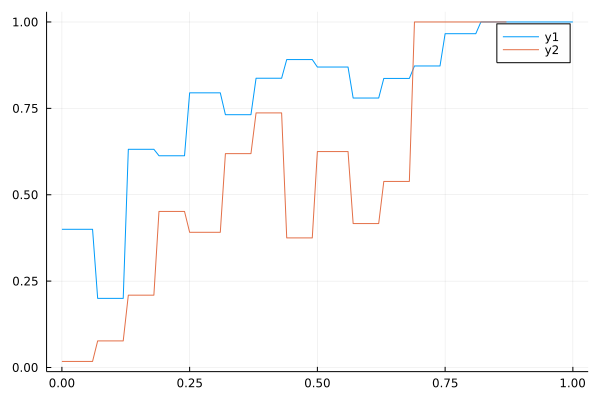

In [210]:
using Plots

plot(ths, bal_to_bals)
plot!(ths, ubal_to_bals)

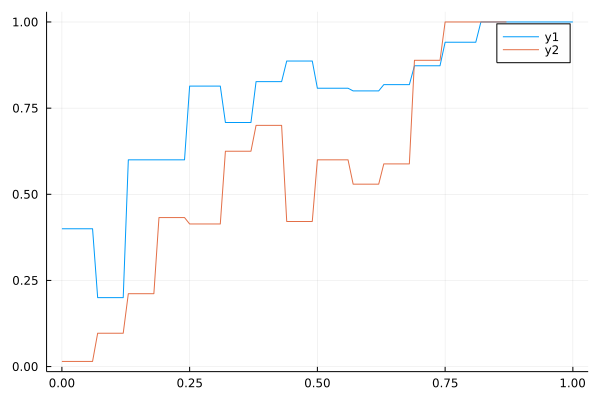

In [211]:

plot(ths, bal_to_bals2)
plot!(ths, ubal_to_bals2)

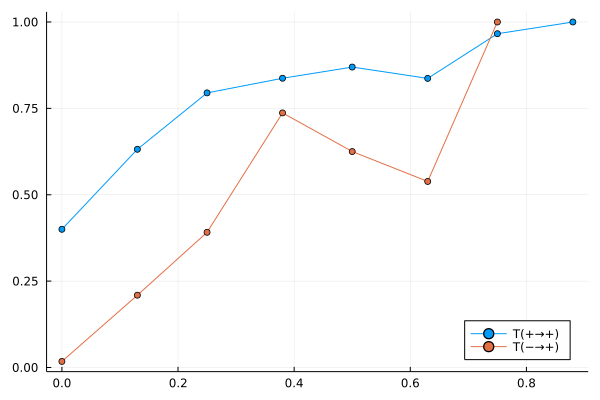

In [239]:
chosen_ths = [0:7...] ./ 8
inds = [findfirst(ths .>= chosen_ths[i]) for i in 1:length(chosen_ths)]

plot(ths[inds], bal_to_bals[inds], markershape = :circle, label = "T(+→+)", legend = :bottomright)
plot!(ths[inds], ubal_to_bals[inds], markershape = :circle, label = "T(−→+)") 

# legend(position=:Best)

Above result is the same as obtained by Joanna. 

Let us now see how it looks like when we accept more threshold values and count triads slightly differently. 

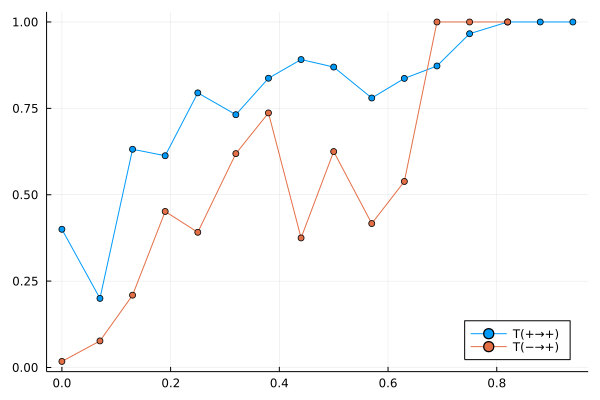

In [240]:
points = 16

chosen_ths = [0:points-1...] ./ points
inds = [findfirst(ths .>= chosen_ths[i]) for i in 1:length(chosen_ths)]

plot(ths[inds], bal_to_bals[inds], markershape = :circle, label = "T(+→+)", legend = :bottomright)
plot!(ths[inds], ubal_to_bals[inds], markershape = :circle, label = "T(−→+)") 

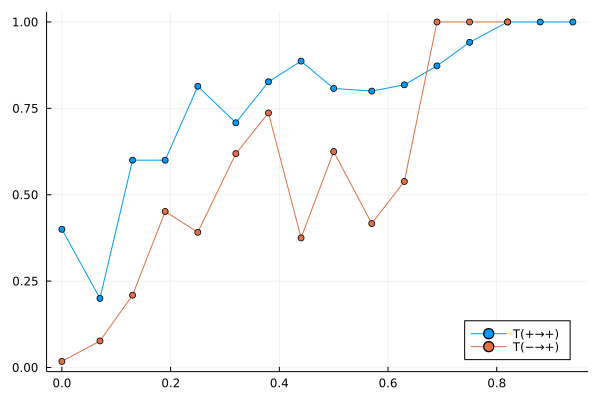

In [242]:
points = 16

chosen_ths = [0:points-1...] ./ points
inds = [findfirst(ths .>= chosen_ths[i]) for i in 1:length(chosen_ths)]

plot(ths[inds], bal_to_bals2[inds], markershape = :circle, label = "T(+→+)", legend = :bottomright)
plot!(ths[inds], ubal_to_bals[inds], markershape = :circle, label = "T(−→+)") 